# Лабораторная работа "Численное дифференцирование"

В этой лабораторной работе мы проведем вычисление первой и второй производной разных порядков точности для выбранной функции.

Вспомогательный код для вычисления и рисования графиков:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

from enum import Enum

class CalcType(Enum):
    DF1, DF2, DDF1, DDF2 = range(4)

class GridFunction:
    def __init__(self, a, b, h):
        self.__a = a
        self.__b = b
        self.__h = h
        self.grid = {x : 0 for x in np.arange(a, b + h, h, dtype=float)}
    
    def plot(self, title_str = ''):
        fig, self.ax = plt.subplots(figsize=(9, 6))
        self.ax.plot(self.grid.keys(), self.grid.values())
        self.ax.set(xlabel='x', ylabel='y', title=title_str)
        self.ax.grid()
    
    def calc(self, func):
        for x in self.grid.keys():
            self.grid[x] = func(x)
    
    def calcD(self, func, dtype = CalcType.DF1):
        a = self.__a
        b = self.__b
        h = self.__h
        
        if dtype == CalcType.DF1:
            for x in self.grid.keys():
                self.grid[x] = (func(x + h) - func(x)) / h

            self.grid[b] = (func(b) - func(b - h)) / h

        elif dtype == CalcType.DF2:
            for x in self.grid.keys():
                self.grid[x] = (-3 * func(x) + 4 * func(x + h) - func(x + 2 * h)) / (2 * h)
                
            self.grid[b - h] = (-func(b - 2 * h) + func(b)) / (2 * h)
            self.grid[b] = (func(b - 2 * h) - 4 * func(b - h) + 3 * func(b)) / (2 * h)

        elif dtype == CalcType.DDF1:
            for x in self.grid.keys():
                self.grid[x] = (func(x) - 2 * func(x + h) + func(x + 2 * h)) / (h * h)

            self.grid[b - h] = (func(b - 2 * h) - 2 * func(b - h) + func(b)) / (h * h)
            self.grid[b] = (func(b - 2 * h) - 2 * func(b - h) + func(b)) / (h * h)
        else:
            for x in self.grid.keys():
                self.grid[x] = (2 * func(x) - 5 * func(x + h) + 4 * func(x + 2 * h) - func(x + 3 * h)) / (h * h)

            self.grid[b - 2 * h] = (func(b - 3 * h) - 2 * func(b - 2 * h) + func(b - h)) / (h * h)
            self.grid[b - h] = (func(b - 2 * h) - 2 * func(b - h) + func(b)) / (h * h)
            self.grid[b] = (-func(b - 3 * h) + 4 * func(b - 2 * h) - 5 * func(b - h) + 2 * func(b)) / (h * h)

class DerivError(GridFunction):
    def __init__(self, begin_h, end_h, step_h, f, df, ddf):
        super().__init__(begin_h, end_h, step_h)
        self.__f = f
        self.__df = df
        self.__ddf = ddf
        
    def plot(self, title_str = ''):
        super().plot(title_str)
        self.ax.set(xlabel='ln(h)', ylabel='ln(Err)')
        x, y = np.array(list(self.grid.keys())), np.array(list(self.grid.values()))
        k, b = np.polyfit(x, y, 1)

        label_str = '{:.2f}*x + {:.2f}'.format(k, b)
        self.ax.plot(self.grid.keys(), k * x + b, 'r-', linewidth=0.5, label=label_str)
        self.ax.legend()
    
    def calc(self, a, b, dtype = CalcType.DF1, logarithm = False):
        if (dtype == CalcType.DF1) or (dtype == CalcType.DF2):
            der_f = self.__df
        else:
            der_f = self.__ddf
        
        for h in self.grid.keys():
            gf = GridFunction(a, b, h)
            gf.calcD(self.__f, dtype)
            
            max_err = m.fabs(gf.grid[a] - der_f(a))
            for x, y in gf.grid.items():
                err = m.fabs(y - der_f(x))
                if err > max_err:
                    max_err = err
            
            self.grid[h] = max_err
        
        if logarithm:
            log_grid = dict()
            for h in self.grid.keys():
                log_grid[m.log(h)] = m.log(self.grid[h])
            
            self.grid = log_grid

В качастве функции возьмем $$f(x) = x^x$$
на отрезке $$[0.1, 1]$$

In [2]:
my_f = lambda x: m.pow(x, x)
my_df = lambda x: m.pow(x, x) * (m.log(x) + 1)
my_ddf = lambda x: m.pow(x, x) * (m.pow(m.log(x) + 1, 2) + 1 / x)

a, b = 0.1, 1

Посчитаем погрешности и выведем график для вычисления первой производной с первым порядком.
Проведем линейную аппроксимацию и найдем коэффициент наклона прямой.

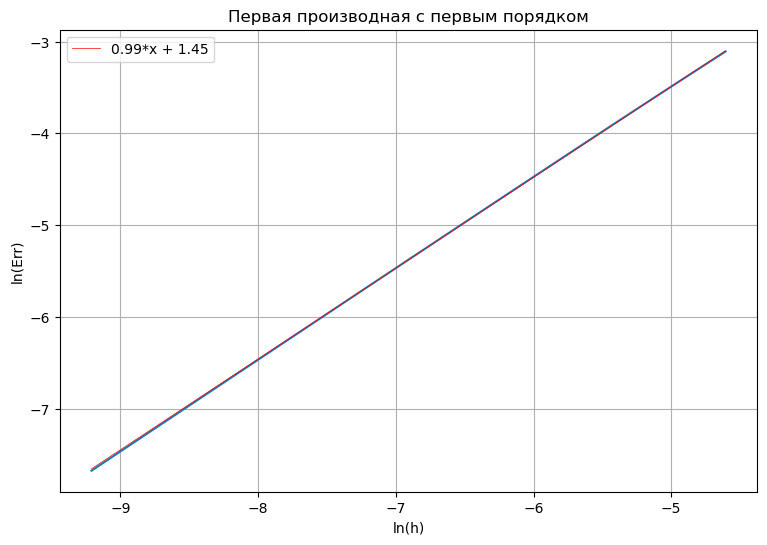

In [3]:
err = DerivError(0.0001, 0.01, 0.0001, my_f, my_df, my_ddf)
err.calc(a, b, CalcType.DF1, True)
err.plot('Первая производная с первым порядком')

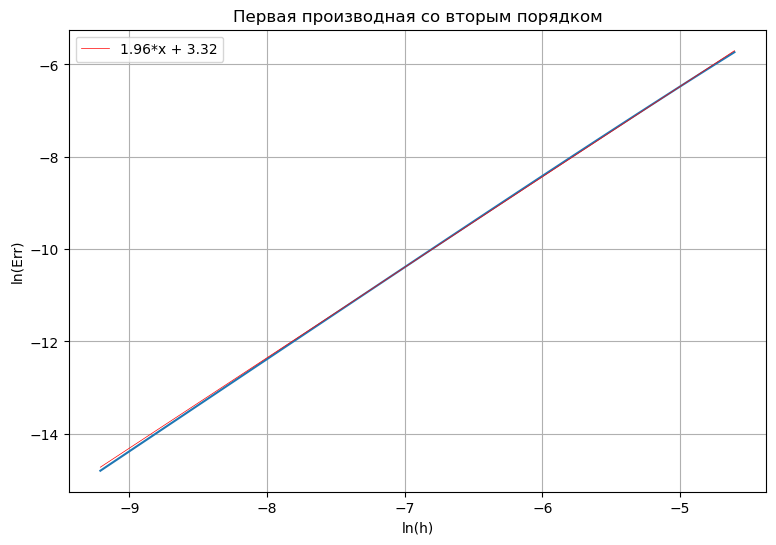

In [4]:
err = DerivError(0.0001, 0.01, 0.0001, my_f, my_df, my_ddf)
err.calc(a, b, CalcType.DF2, True)
err.plot('Первая производная со вторым порядком')

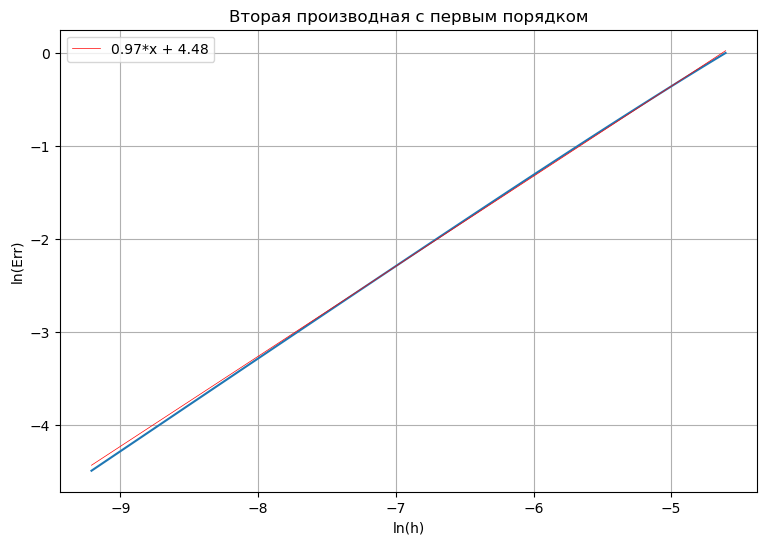

In [5]:
err = DerivError(0.0001, 0.01, 0.0001, my_f, my_df, my_ddf)
err.calc(a, b, CalcType.DDF1, True)
err.plot('Вторая производная с первым порядком')

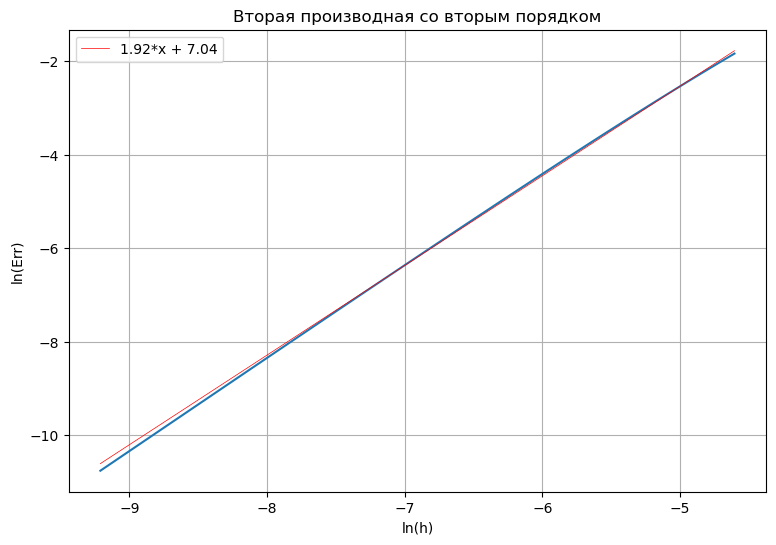

In [6]:
err = DerivError(0.0001, 0.01, 0.0001, my_f, my_df, my_ddf)
err.calc(a, b, CalcType.DDF2, True)
err.plot('Вторая производная со вторым порядком')